In [1]:
import torch
from torchvision import datasets, transforms
import helper



import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


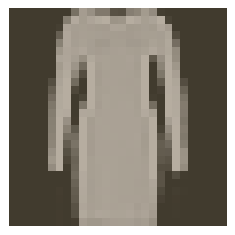

In [2]:
images, labels = next(iter(trainloader))
helper.imshow(images[0,:]);

In [3]:
### Building the network
from torch import optim
from torch import nn

In [4]:
### Create the network, define criterion and optimizer
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)


In [5]:
## Train the network

In [6]:
epochs = 8
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.3777527628359256
Training loss: 0.6294433871057751
Training loss: 0.538447704968422
Training loss: 0.48625395853699904
Training loss: 0.451785955458943
Training loss: 0.4275096728444608
Training loss: 0.4077775061035207
Training loss: 0.39092842668993893


/Users/biplabkumardas/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


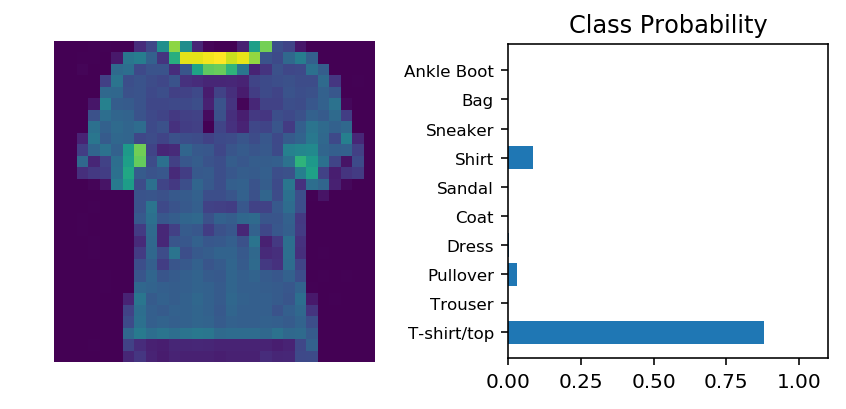

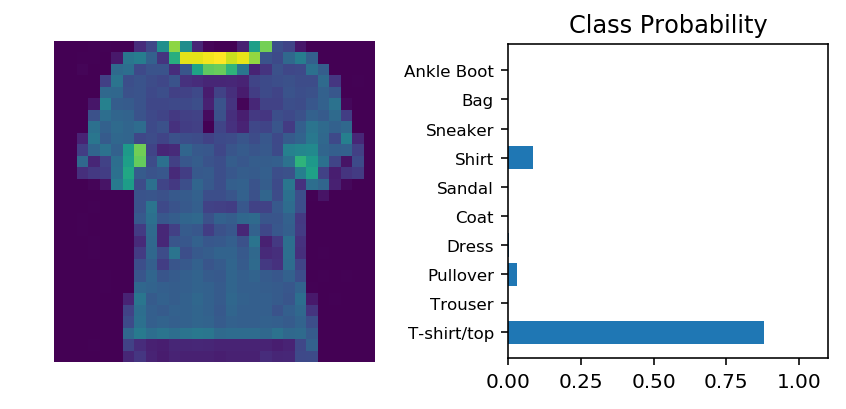

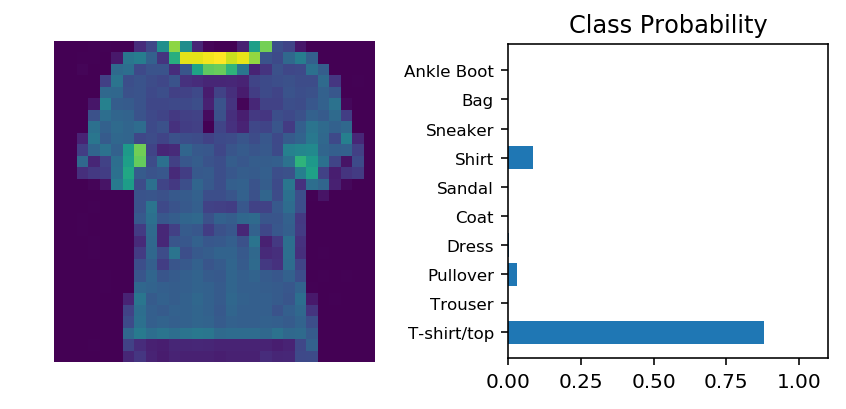

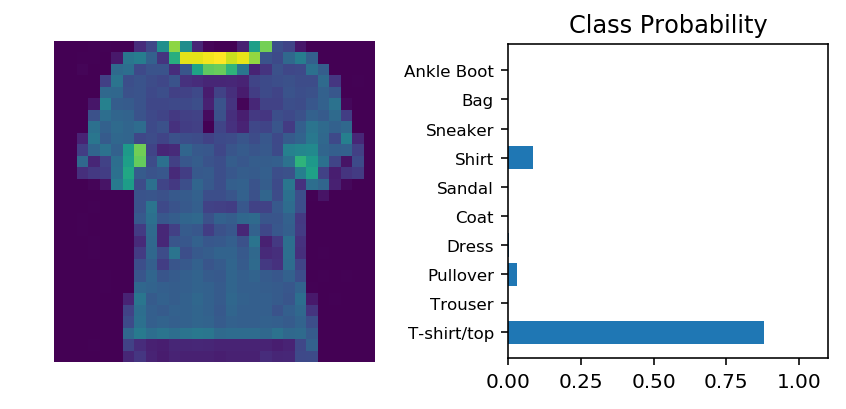

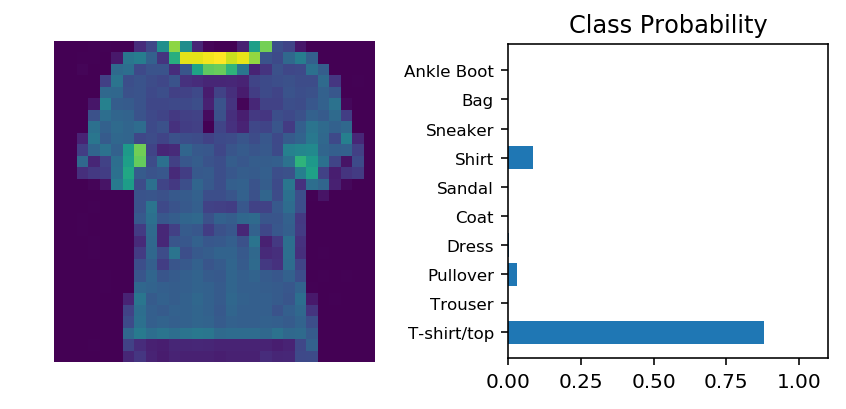

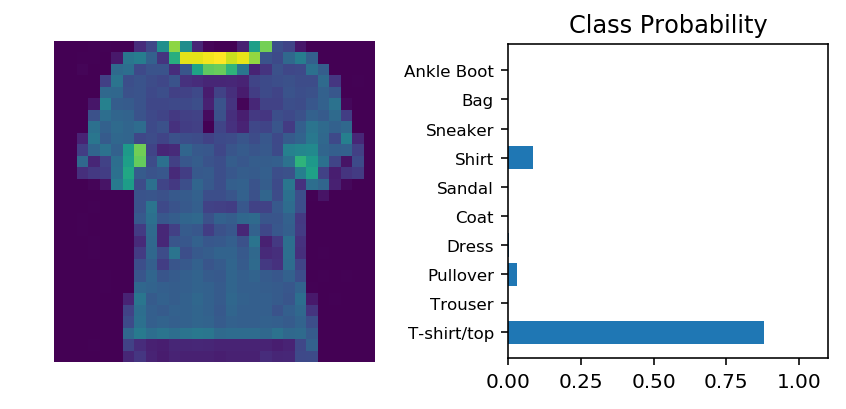

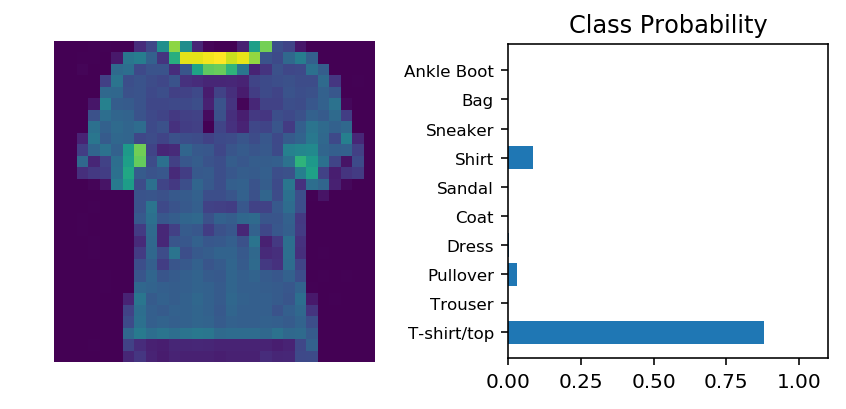

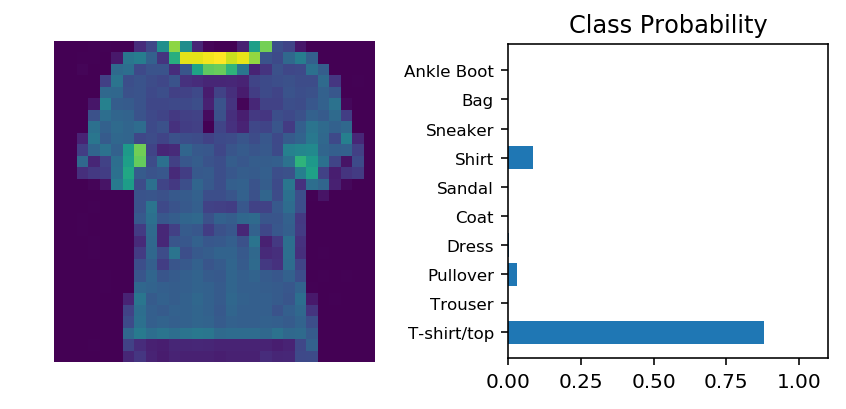

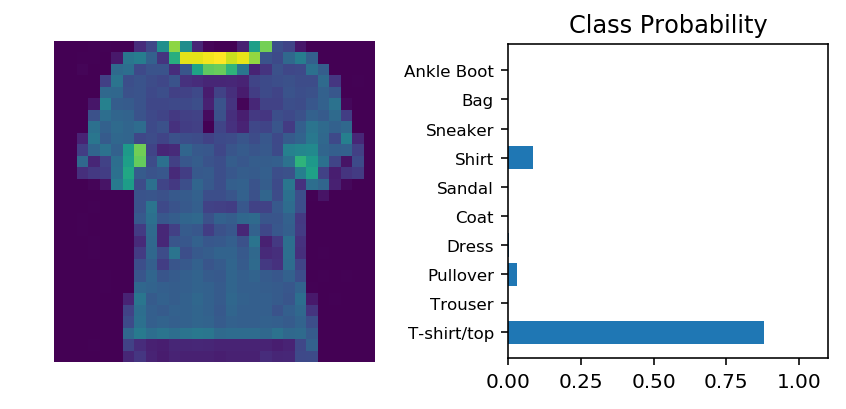

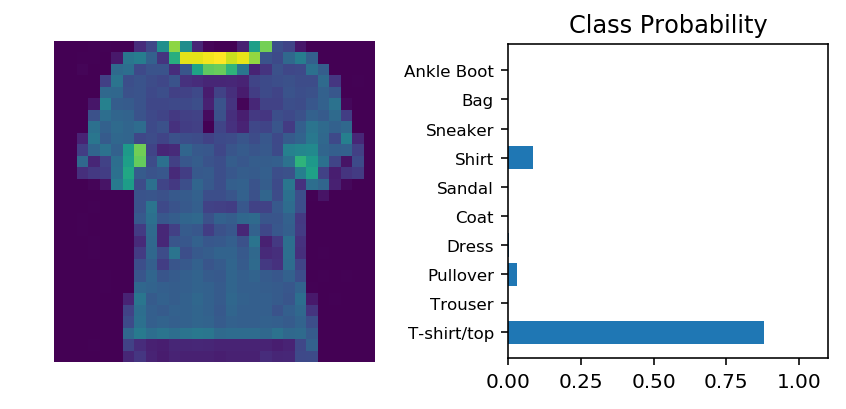

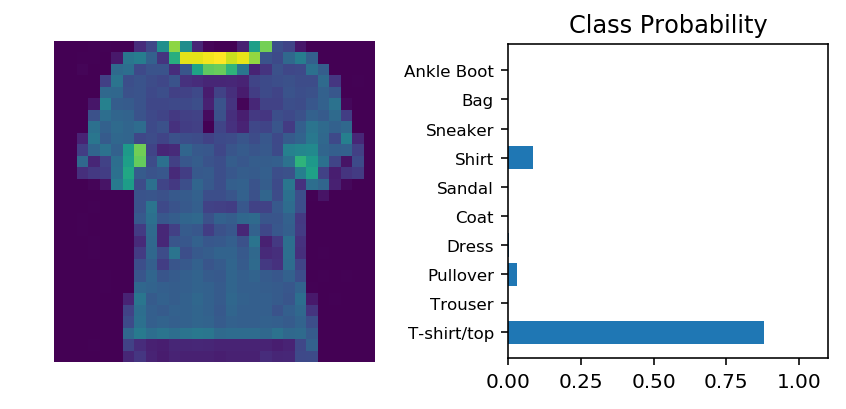

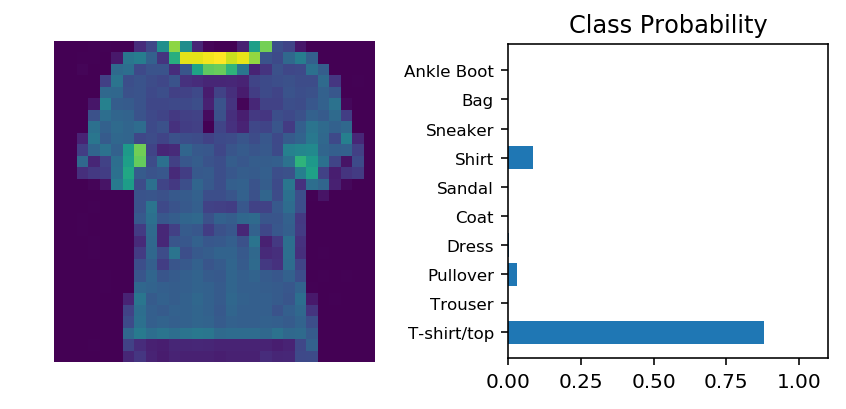

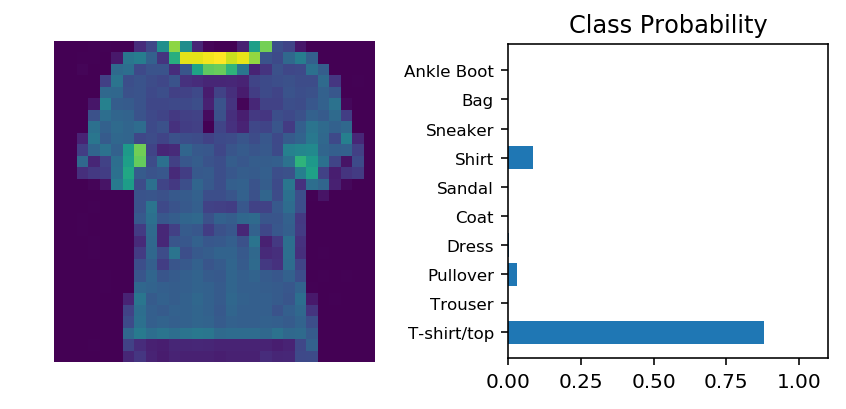

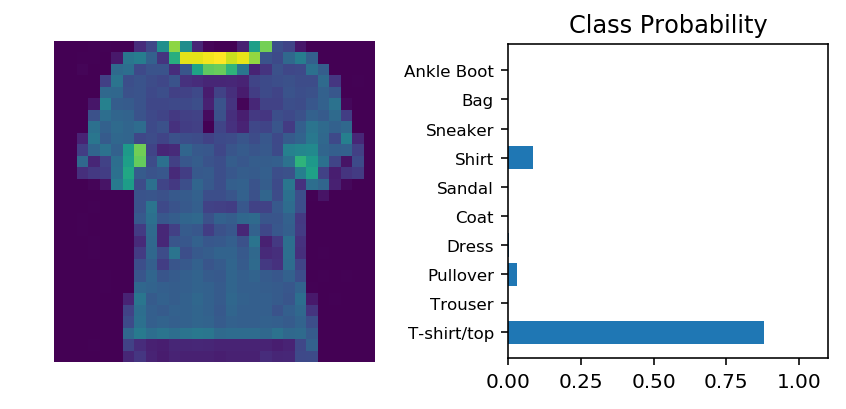

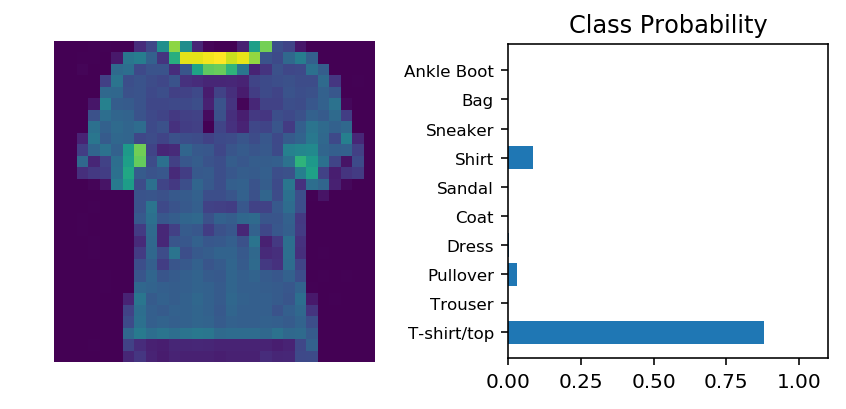

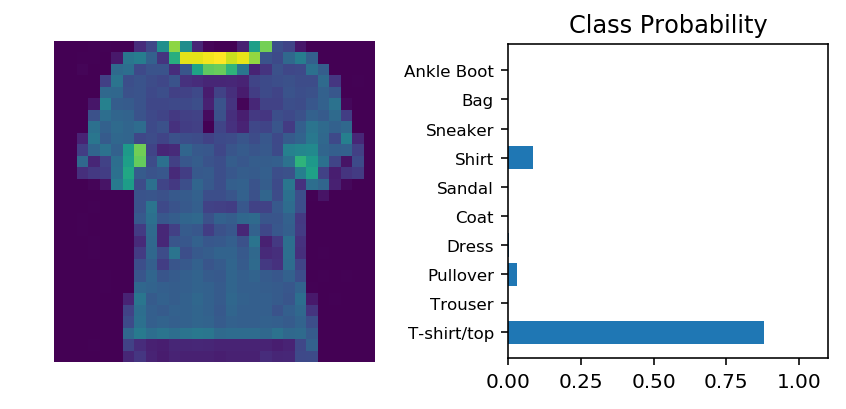

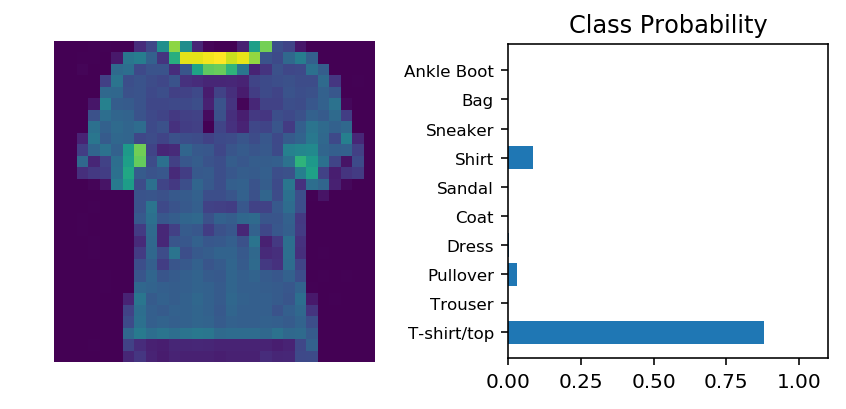

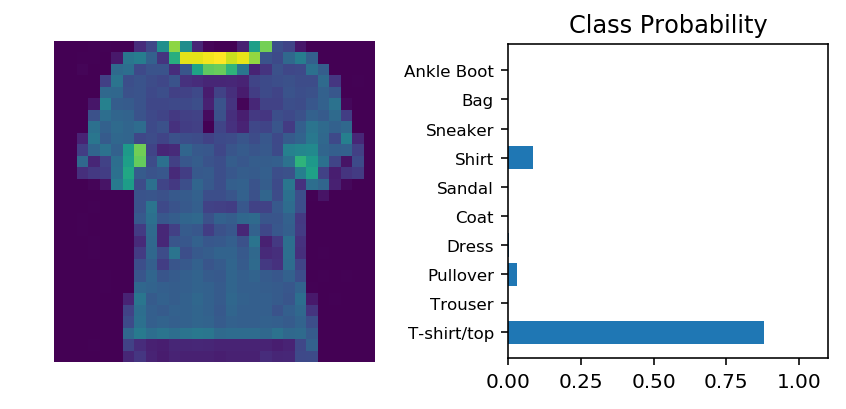

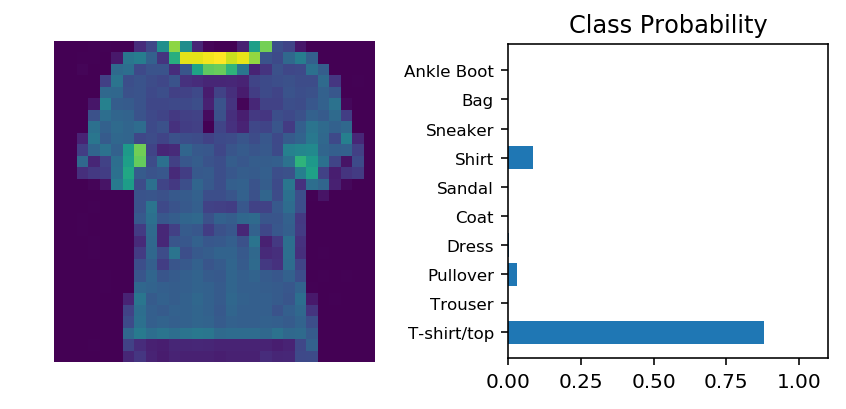

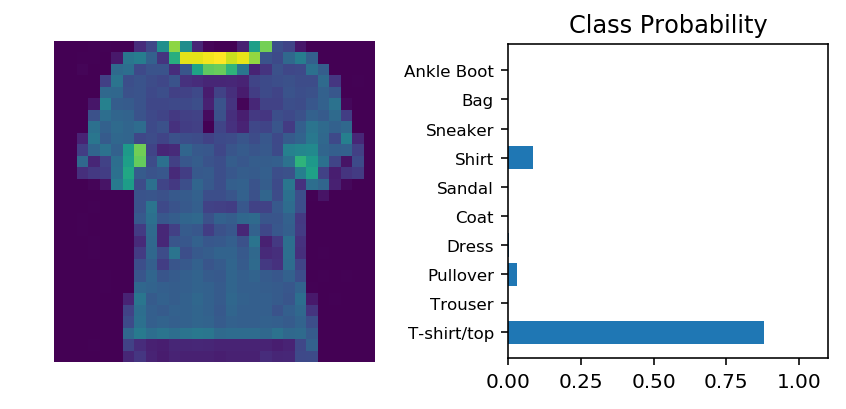

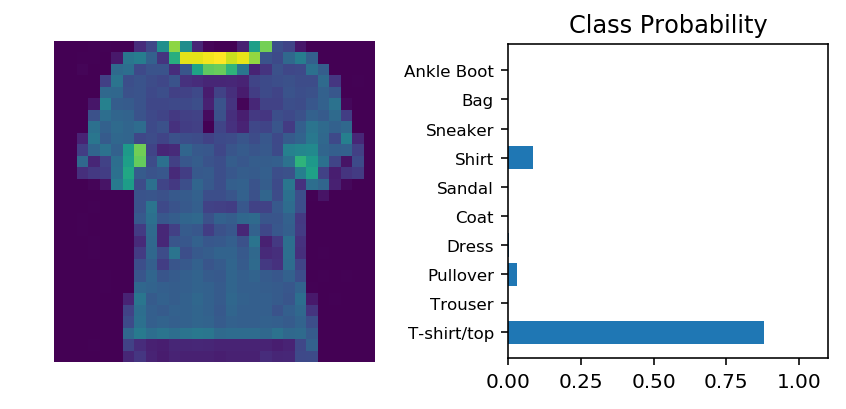

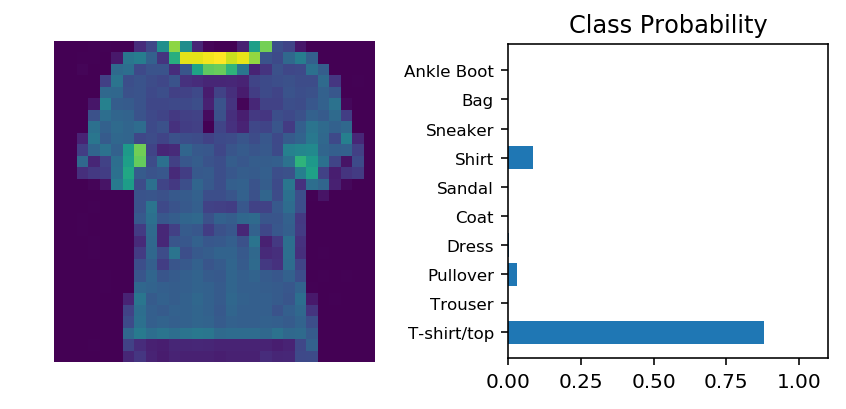

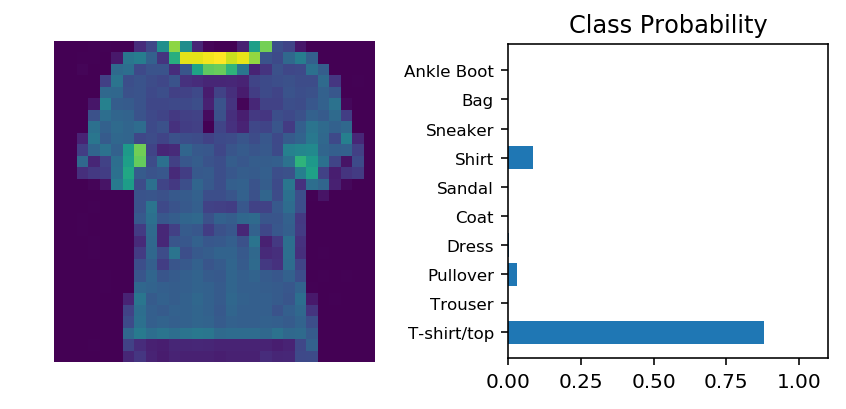

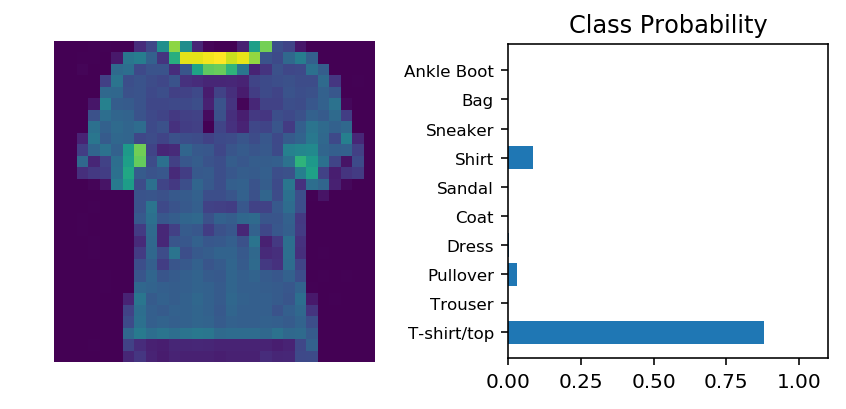

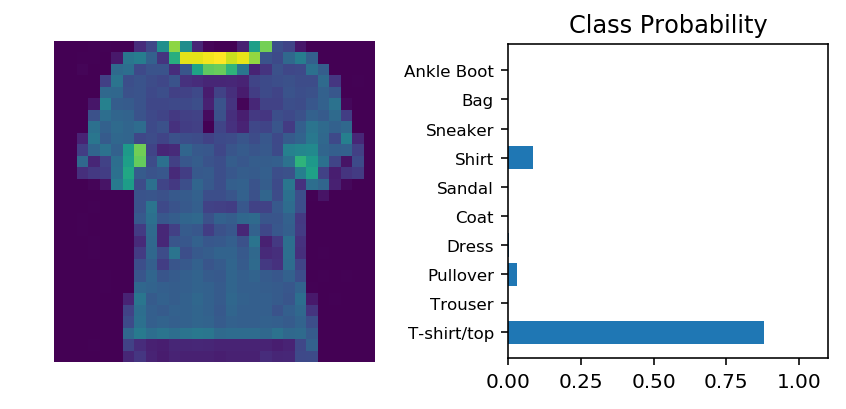

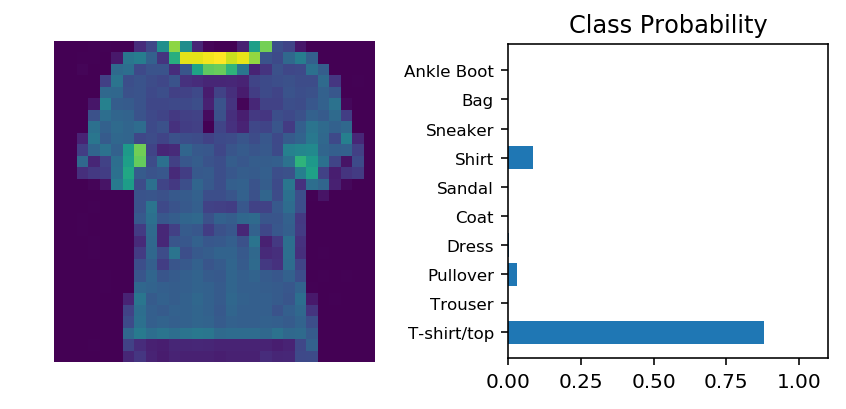

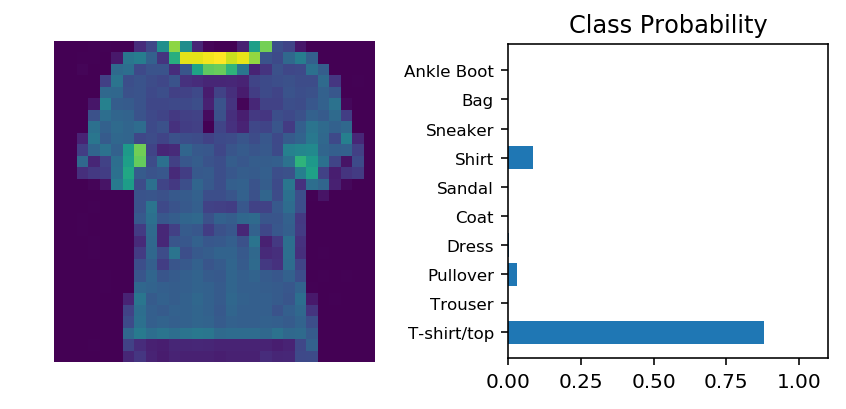

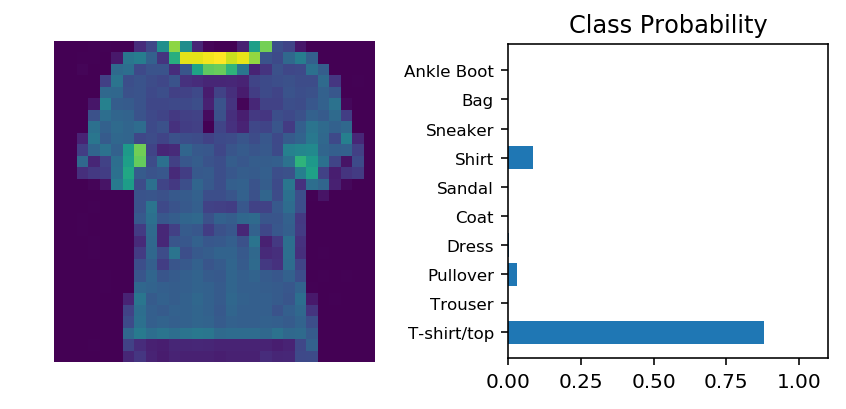

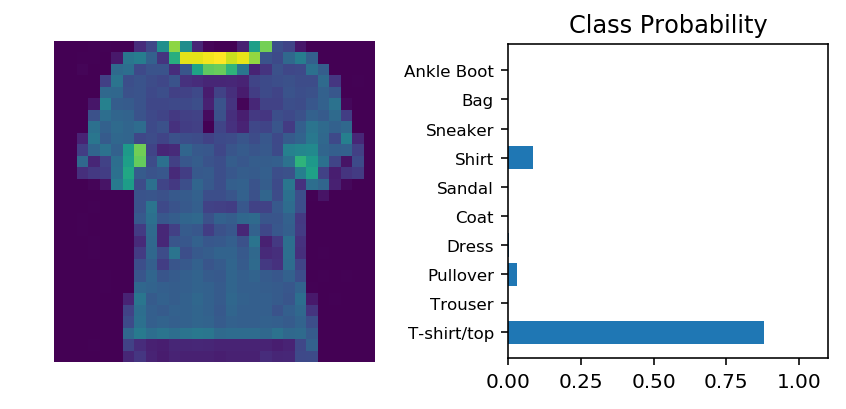

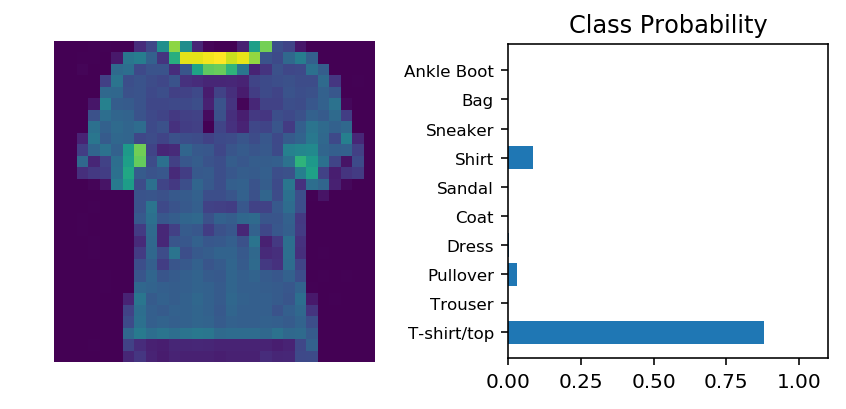

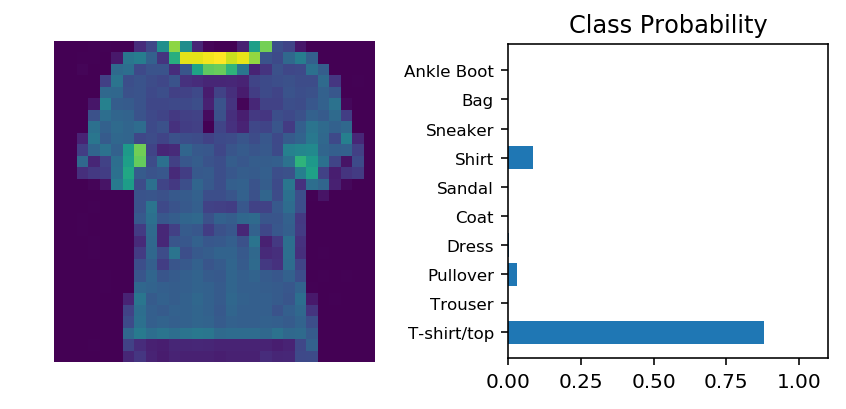

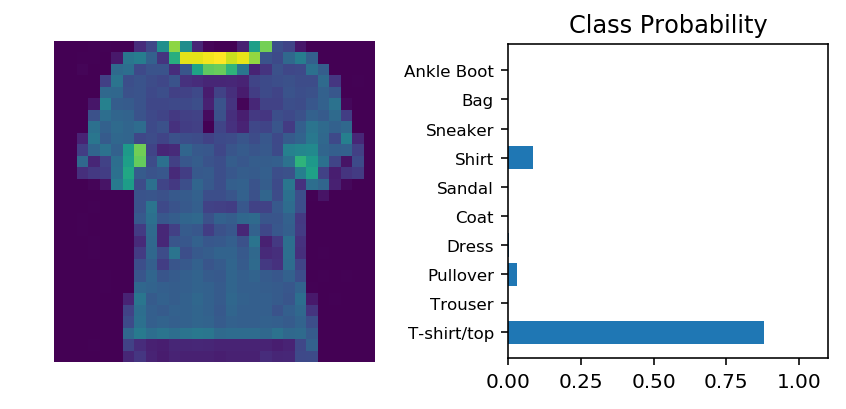

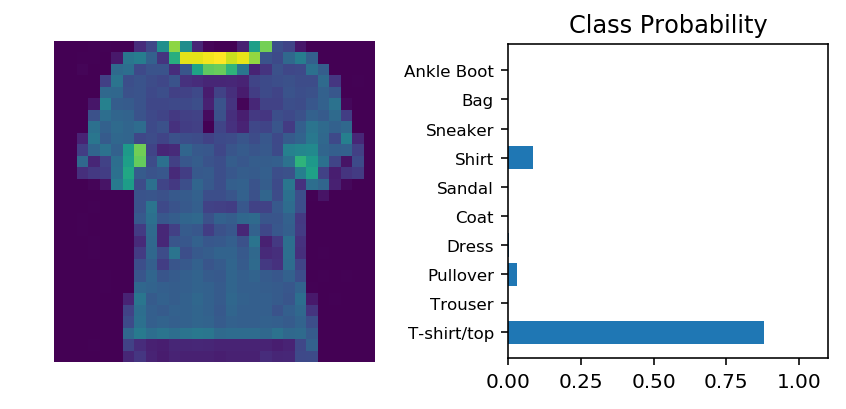

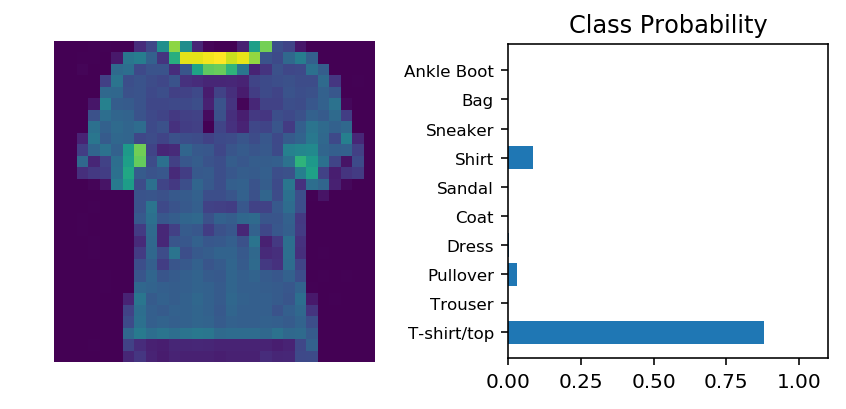

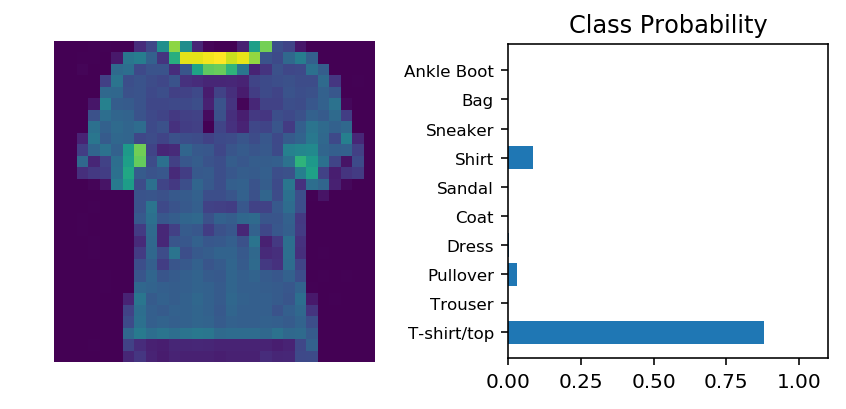

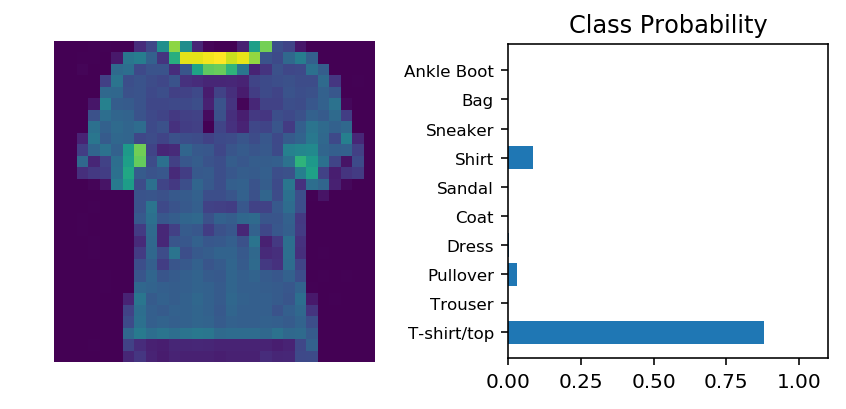

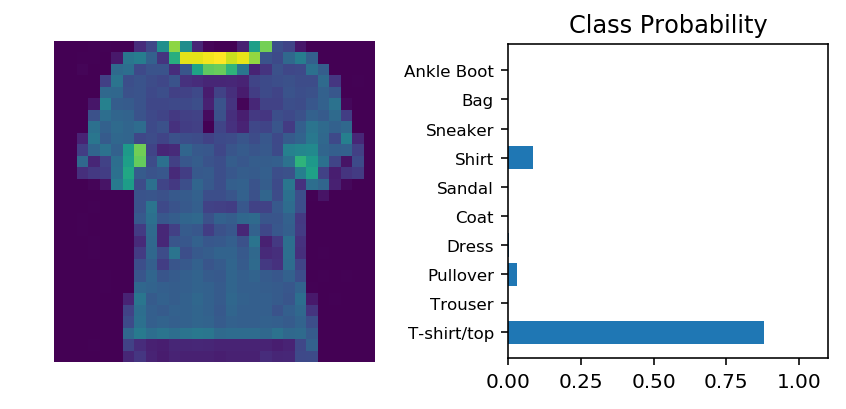

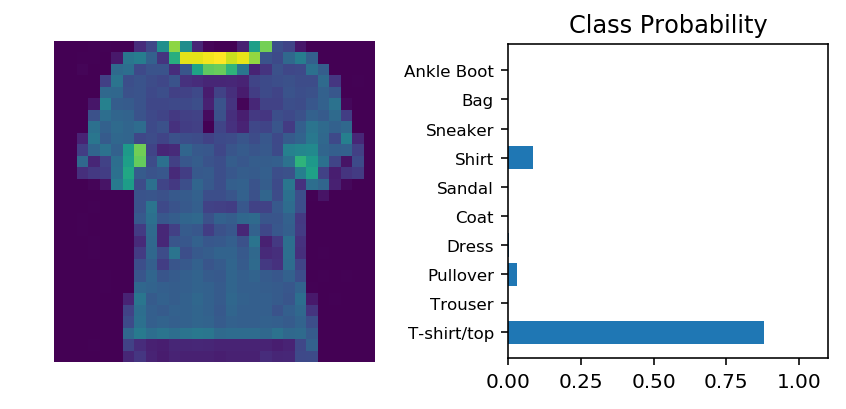

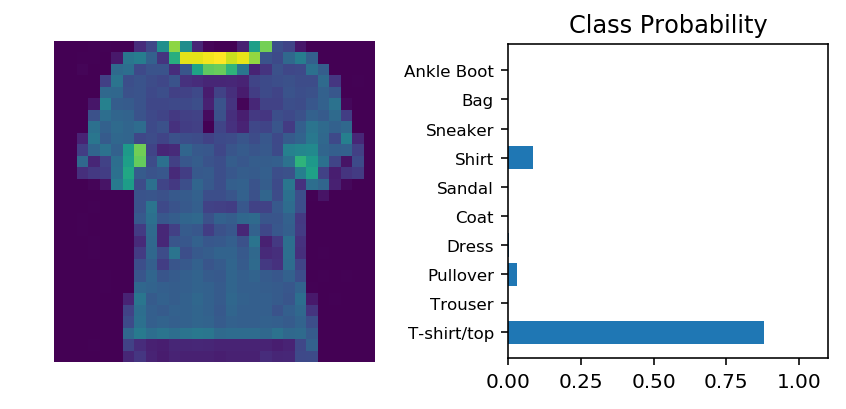

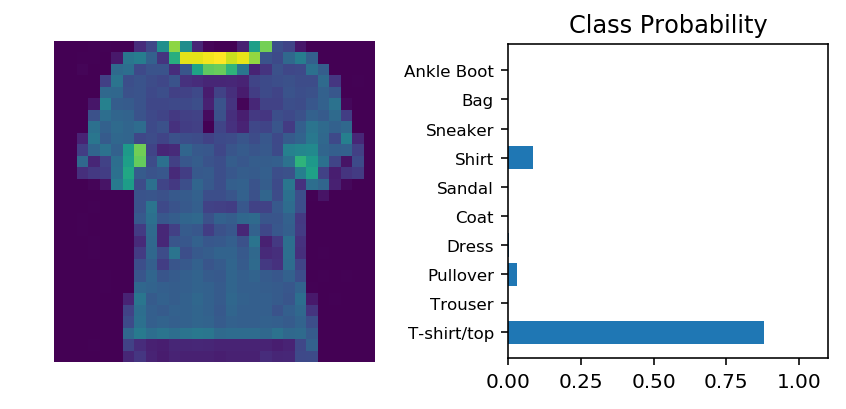

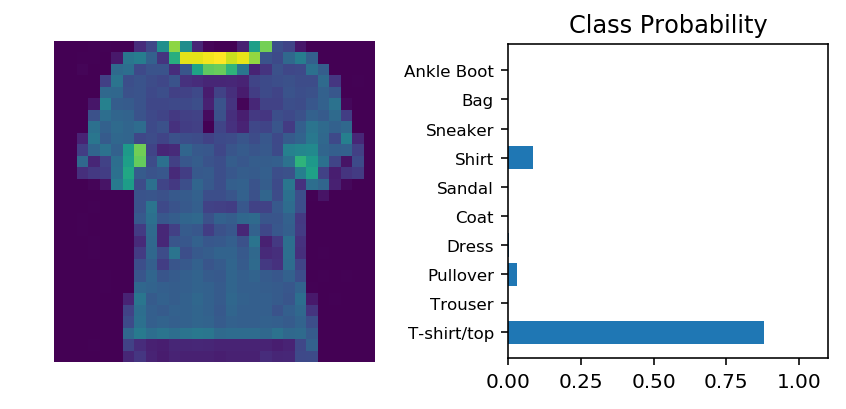

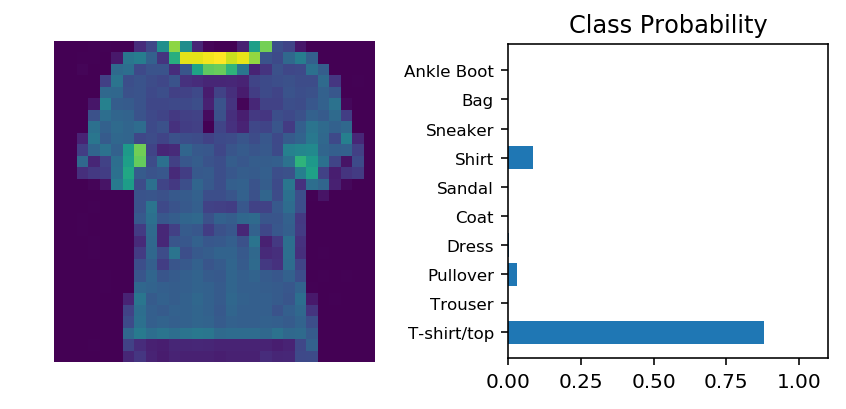

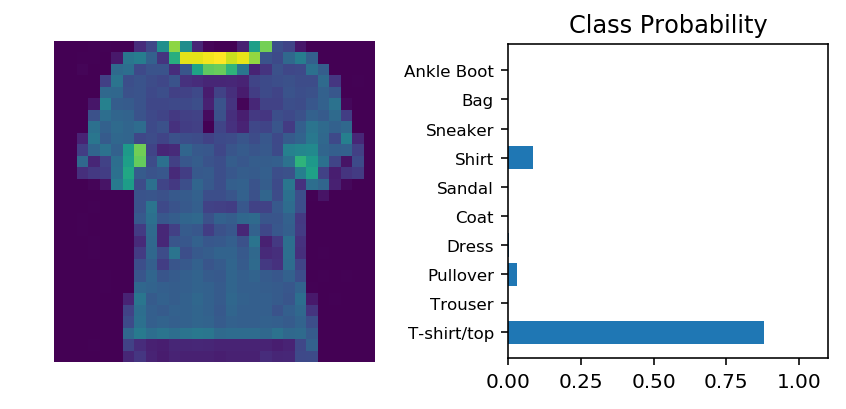

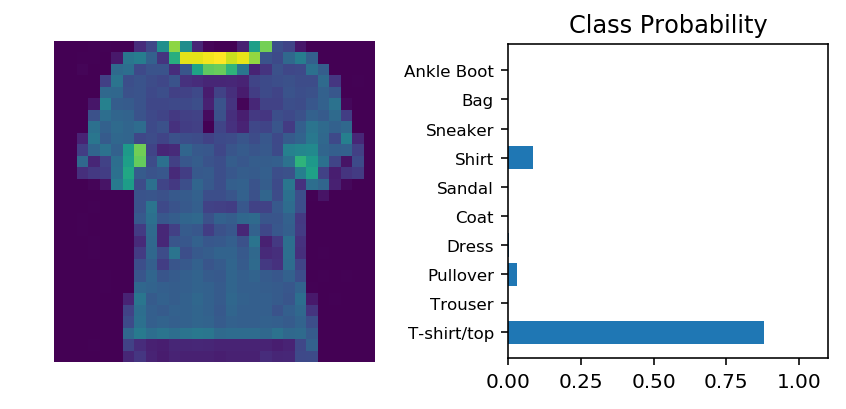

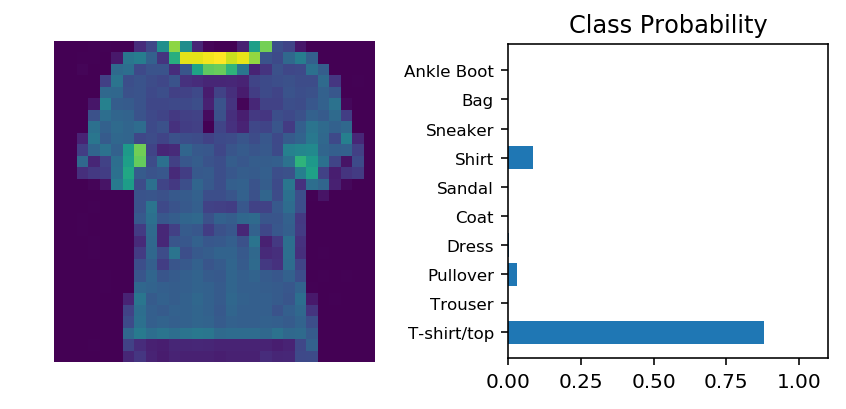

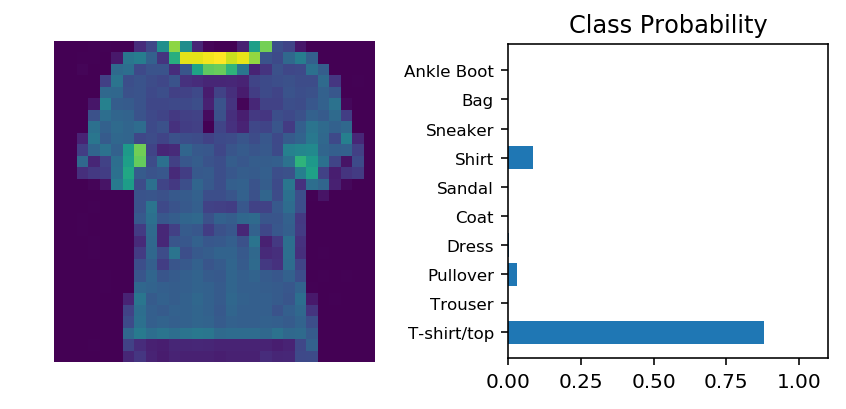

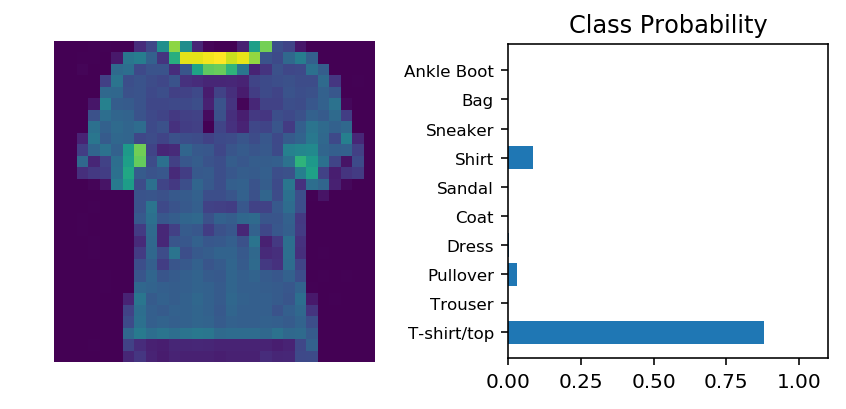

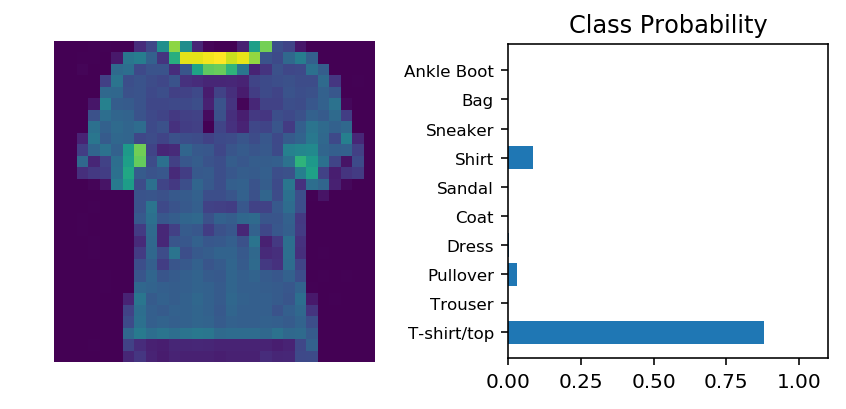

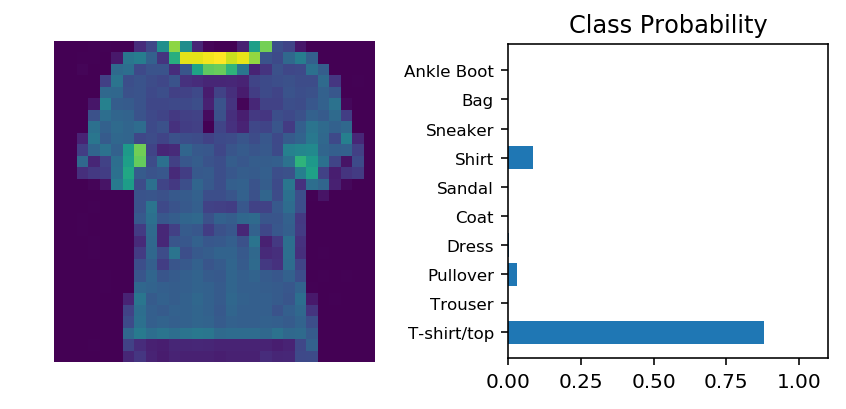

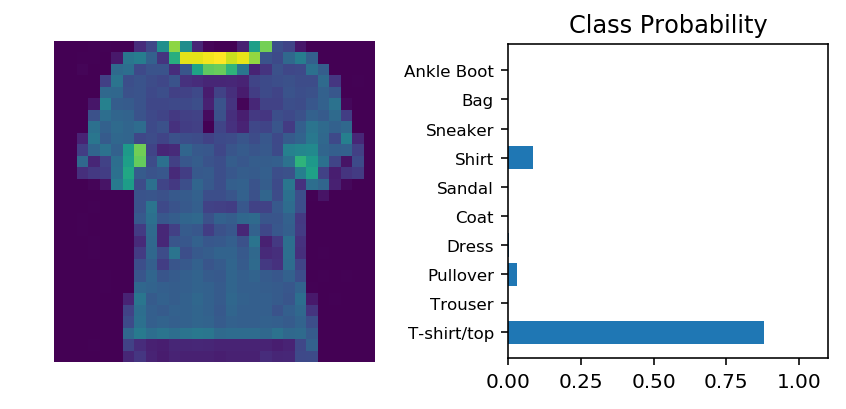

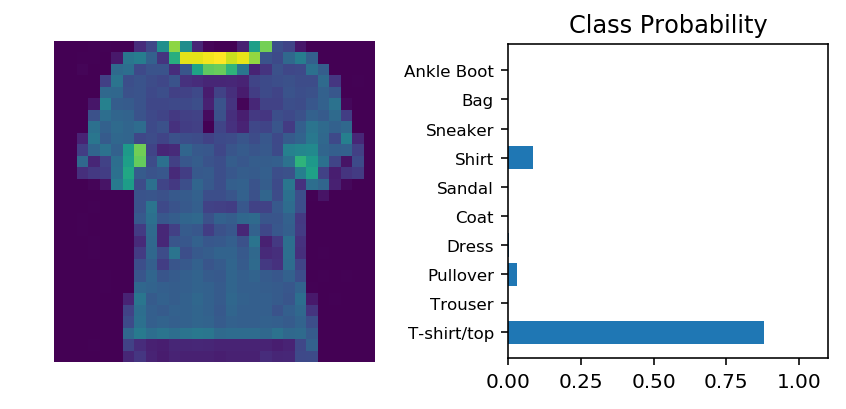

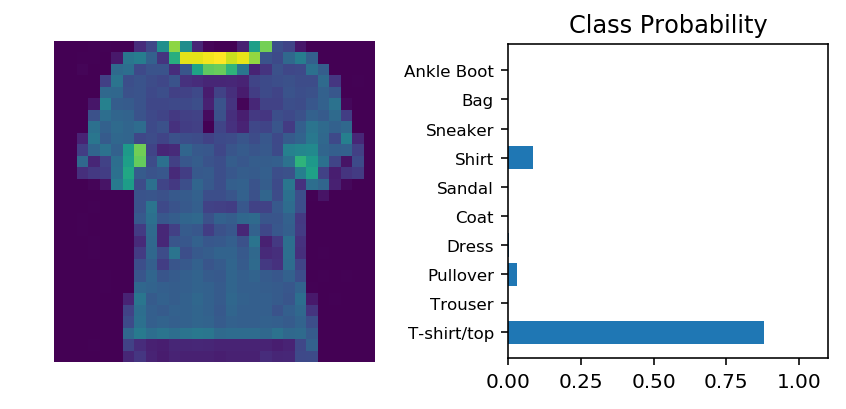

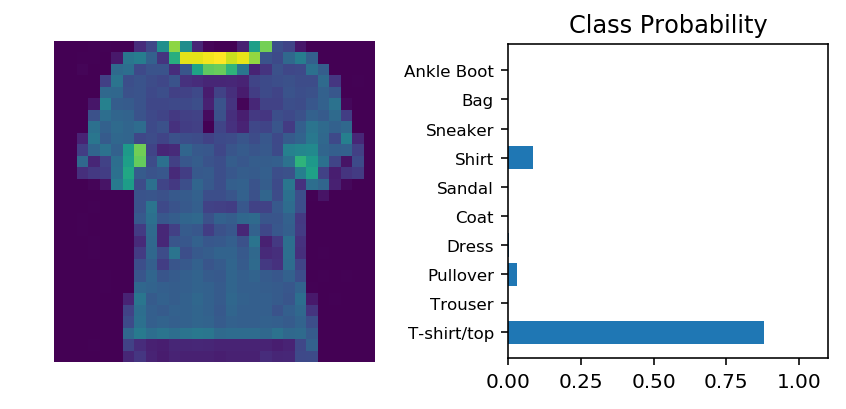

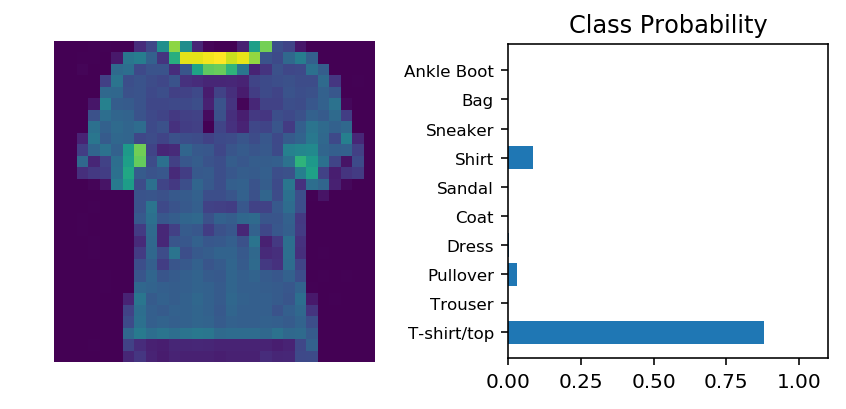

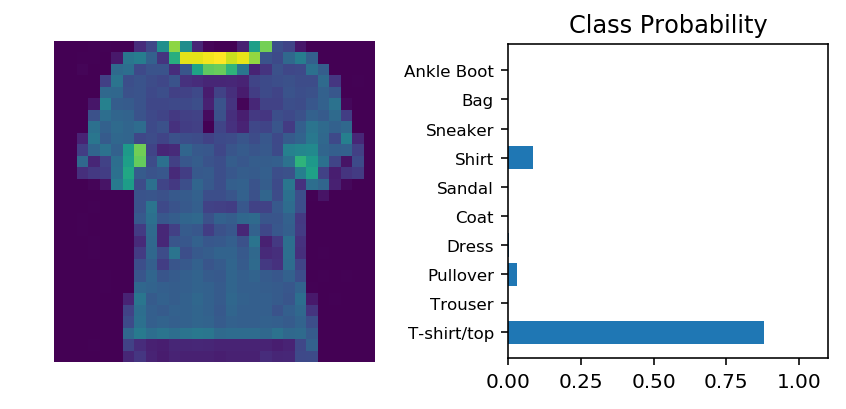

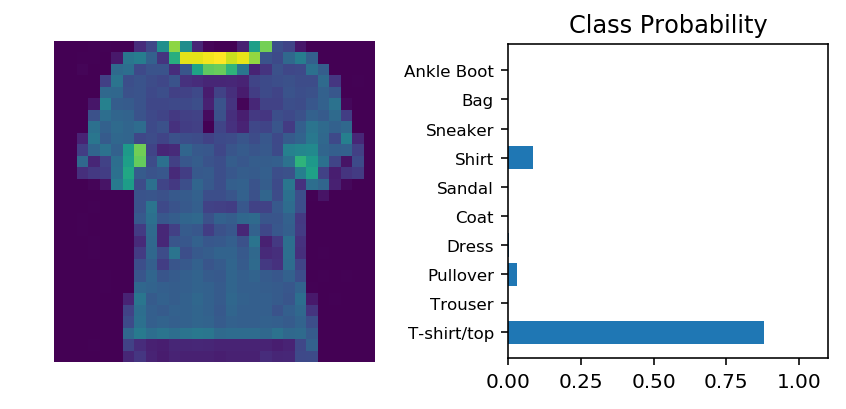

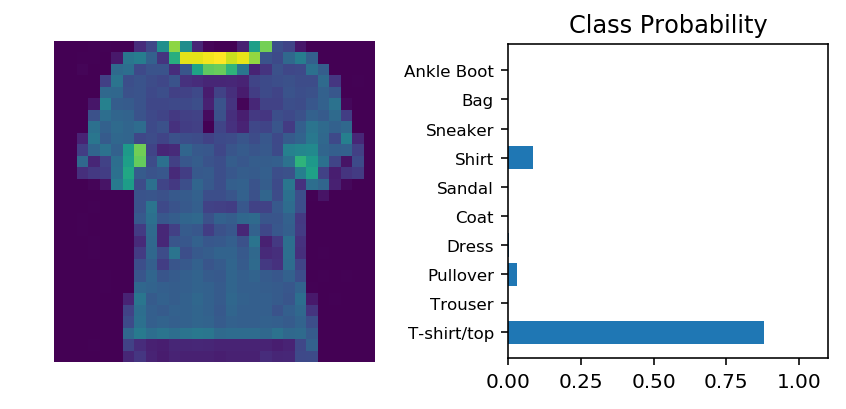

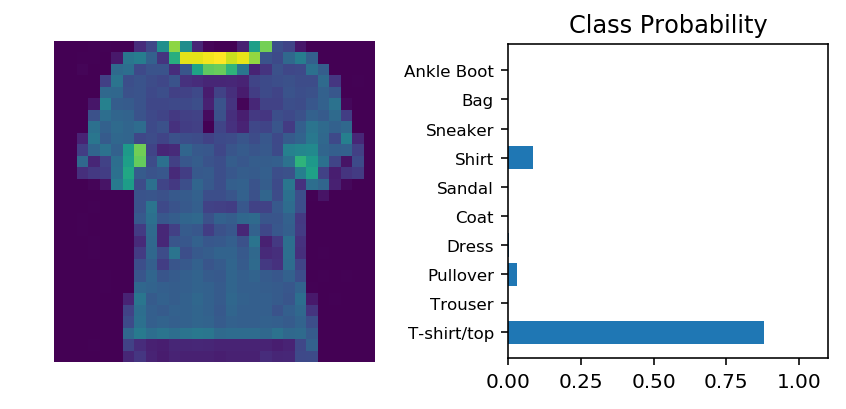

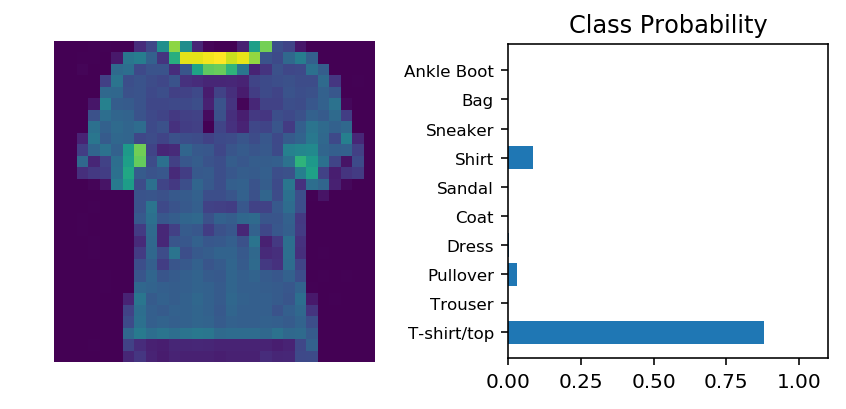

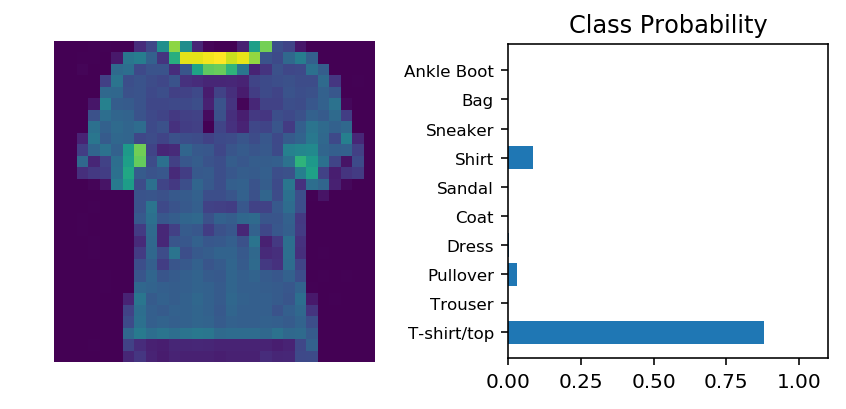

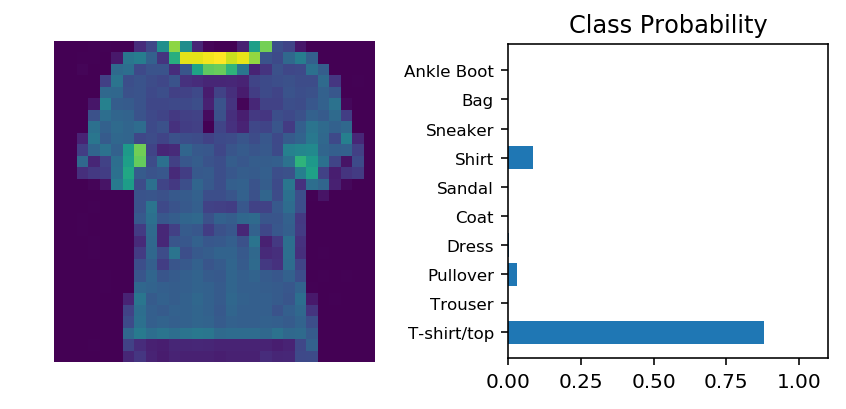

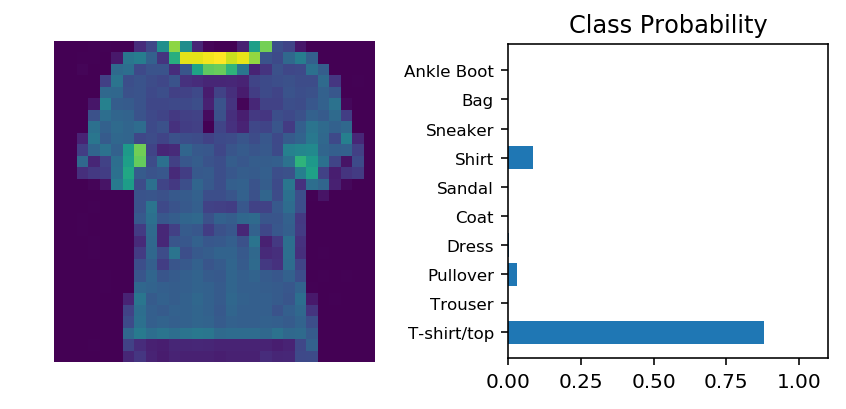

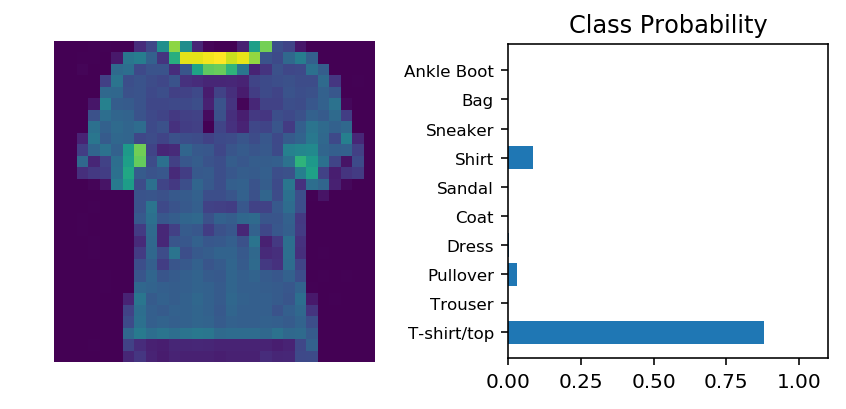

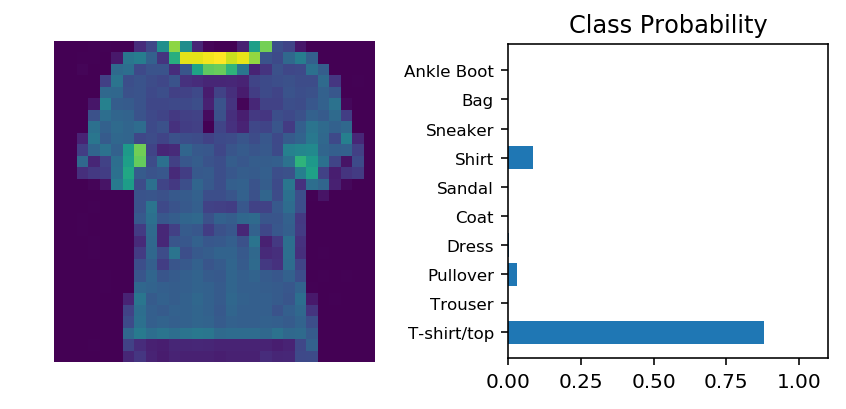

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities

#helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

for image in images:
    img = img.resize_(1, 784)
    ps = torch.exp(model(img))
    helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')
